In [17]:
# Import Statements
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [18]:
# Initial Exploration
df = pd.read_csv("NBA_Dataset.csv")
df = df.dropna()
print(df.columns)
df.head()

Index(['season', 'player', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws',
       'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'award_share', 'mov',
       'mov_adj', 'win_loss_pct'],
      dtype='object')


,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768


In [19]:
# Find the MVP Winners by season
mvp_winner = df.groupby('season')['award_share'].transform('max')
print(mvp_winner)

0        0.735
1        0.735
2        0.735
3        0.735
4        0.735
         ...  
17691    0.875
17692    0.875
17693    0.875
17694    0.875
17695    0.875
Name: award_share, Length: 14783, dtype: float64


In [20]:
# Put these into the df
df['is_mvp'] = (df['award_share'] == mvp_winner).astype(int)

In [21]:
# Split into X and Y
X = df.drop(['award_share', 'is_mvp', 'player', 'team_id', 'pos'], axis=1)
Y = df['is_mvp']

In [22]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
# Find Hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'bootstrap': [True, False]        
}


In [24]:
# Hyperparameter Tuning using Grid Search with Cross-Validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [25]:
# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [26]:
# Evaluate the Best Model from Grid Search
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
# Print the results
print("Best Parameters:", best_params)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Model Accuracy: 0.9986472776462632
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2950
           1       1.00      0.43      0.60         7

    accuracy                           1.00      2957
   macro avg       1.00      0.71      0.80      2957
weighted avg       1.00      1.00      1.00      2957

Confusion Matrix:
 [[2950    0]
 [   4    3]]


In [31]:
# Get Feature Importances from the Best Model
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top 20 Feature Importances:\n", feature_importances.head(20))

Top 20 Feature Importances:
 win_loss_pct    0.092452
vorp            0.074480
ws_per_48       0.069082
ws              0.055780
mov_adj         0.052974
mov             0.052614
ows             0.041487
bpm             0.039030
per             0.030781
obpm            0.026537
dws             0.025664
pts_per_g       0.024260
tov_per_g       0.019552
trb_per_g       0.018328
dbpm            0.017672
drb_per_g       0.017092
fta_per_g       0.016286
fga_per_g       0.015967
efg_pct         0.015521
mp              0.014806
dtype: float64


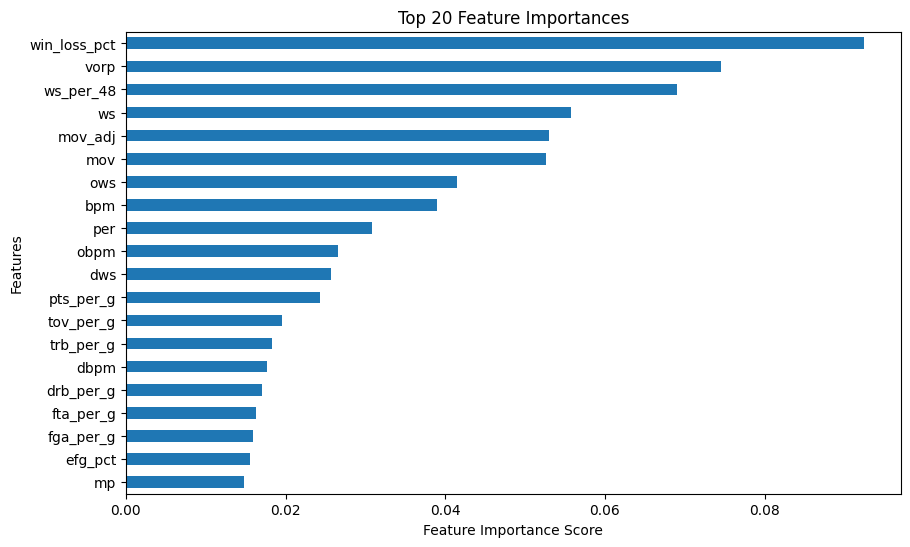

In [32]:
# Feature Importance Visualization
import matplotlib.pyplot as plt
top_n = 20
plt.figure(figsize=(10, 6))
feature_importances.iloc[:top_n].plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis() 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()